# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


474

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
temp=[]
humidity=[]
cloudy=[]
wind_speed=[]
date=[]
long=[]
lat=[]
city=[]
for city in cities:
    time.sleep(1)
    print(f'processing {city}')
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
    response = requests.get(url).json()
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        long.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])

    except:
        print('skipped this city')
        pass 
    

processing iquique
processing vaini
processing coihaique
processing baicheng
processing iqaluit
processing vallenar
processing taolanaro
skipped this city
processing provideniya
processing hermanus
processing sabang
processing asau
processing port lincoln
processing barrow
processing dikson
processing punta arenas
processing nizhneyansk
skipped this city
processing marsa matruh
processing klaksvik
processing butaritari
processing busselton
processing nanortalik
processing atuona
processing tsabong
processing east london
processing ushuaia
processing port alfred
processing bluff
processing port hardy
processing amuntai
processing yellowknife
processing cururupu
processing namibe
processing guangyuan
processing narsaq
processing askino
processing la ronge
processing benin
processing vao
processing saleaula
skipped this city
processing mataura
processing kitimat
processing rikitea
processing nikolskoye
processing san patricio
processing post falls
processing bathsheba
processing poya
proc

processing siguiri
processing bata
processing hambantota
processing mokhsogollokh
processing bolungarvik
skipped this city
processing yanan
skipped this city
processing tura
processing geraldton
processing vestmanna
processing tuscaloosa
processing calama
processing khuzhir
processing makakilo city
processing kajaani
processing luderitz
processing changping
processing balkhash
processing wangqing
processing havoysund
processing marzuq
processing atar
processing dzhusaly
skipped this city
processing amalapuram
processing neuquen
processing kropotkin
processing nanga eboko
processing yulara
processing mana
processing fort saint james
processing beloha
processing umm lajj
processing salta
processing constitucion
processing palmer
processing teahupoo
processing oksfjord
processing verkhoyansk
processing atmakur
processing cascais
processing rungata
skipped this city
processing toliary
skipped this city
processing lunenburg
processing copiapo
processing basco
processing bur gabo
skipped thi

In [5]:
#time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.localtime())

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather={ 'Lat':lat,
         'Lng':long,
         'Max Temp':temp, 
         'Humidity': humidity, 
         'Cloudiness':cloudy, 
         'Wind Speed': wind_speed,
        'Date': date}



In [7]:
weather_df=pd.DataFrame(weather)
weather_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-20.22,-70.14,64.40,68,20,14.99,1604331217
1,-21.20,-175.20,73.40,94,75,9.17,1604331493
2,-45.58,-72.07,60.80,63,0,4.99,1604331494
3,45.62,122.82,24.35,75,0,9.33,1604331495
4,63.75,-68.51,15.80,72,75,10.29,1604331496
...,...,...,...,...,...,...,...
432,24.47,54.37,84.20,66,0,5.82,1604331906
433,4.71,-74.23,66.20,55,40,5.82,1604332051
434,43.47,-111.97,28.40,63,1,6.93,1604331854
435,58.52,-117.14,17.60,100,90,6.93,1604332053


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df.dtypes

Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Date            int64
dtype: object

In [9]:
weather_clean=weather_df.loc[weather_df['Humidity']>100]
indicies=weather_df.loc[weather_df['Humidity']>100].index

In [10]:
weather_clean

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-20.22,-70.14,64.40,68,20,14.99,1604331217
1,-21.20,-175.20,73.40,94,75,9.17,1604331493
2,-45.58,-72.07,60.80,63,0,4.99,1604331494
3,45.62,122.82,24.35,75,0,9.33,1604331495
4,63.75,-68.51,15.80,72,75,10.29,1604331496
...,...,...,...,...,...,...,...
432,24.47,54.37,84.20,66,0,5.82,1604331906
433,4.71,-74.23,66.20,55,40,5.82,1604332051
434,43.47,-111.97,28.40,63,1,6.93,1604331854
435,58.52,-117.14,17.60,100,90,6.93,1604332053


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data=weather_df.drop(indicies, inplace='False' ) function of indicies

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

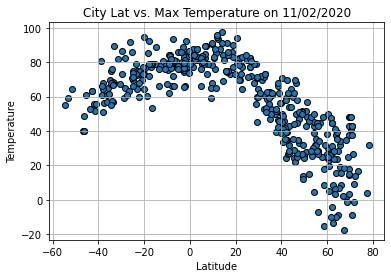

In [13]:
from datetime import datetime
now = datetime.now() # current date and time
date_time = now.strftime("%m/%d/%Y")
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], edgecolors='black')
plt.grid('True')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f'City Lat vs. Max Temperature on {date_time}')
plt.savefig('../output_data/temp_plot.png')

#time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.localtime())

## Latitude vs. Humidity Plot

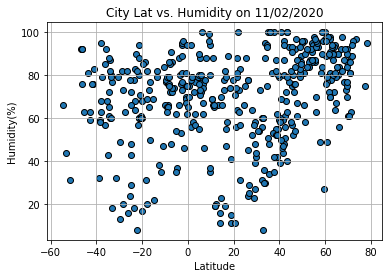

In [14]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'], edgecolors='black')
plt.grid('True')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'City Lat vs. Humidity on {date_time}')
plt.savefig('../output_data/humidity_plot.png')

## Latitude vs. Cloudiness Plot

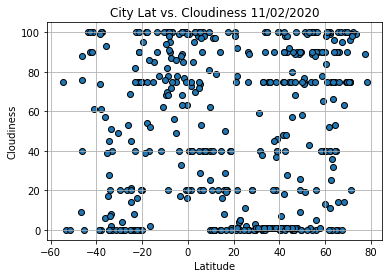

In [15]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], edgecolors='black')
plt.grid('True')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Lat vs. Cloudiness {date_time}')
plt.savefig('../output_data/cloudiness_plot.png')

## Latitude vs. Wind Speed Plot

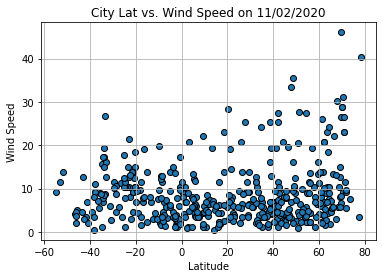

In [16]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], edgecolors='black')
plt.grid('True')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Lat vs. Wind Speed on {date_time}')
plt.savefig('../output_data/wind_speed_plot.png')

## Linear Regression

In [17]:
#desert 
#plt.annotate()
northern=weather_df.loc[weather_df['Lat']>0].astype('float')
southern=weather_df.loc[weather_df['Lat']<=0]

def lr(x,y):
    (slope, intercept, rvalue)= linregress(x,y)
    regress_values= x * slope + intercept
    line_eq= 'y = ' + str(round(slope, 2)) + 'x' +str(round(intercept, 2))
    plt.scatter(x,y)
    plt.annotate(line_eq, fontsize=15)
northern

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
3,45.62,122.82,24.35,75.0,0.0,9.33,1.604331e+09
4,63.75,-68.51,15.80,72.0,75.0,10.29,1.604331e+09
6,64.38,-173.30,23.56,94.0,53.0,7.54,1.604331e+09
8,5.89,95.32,82.17,78.0,98.0,3.69,1.604332e+09
9,46.43,26.40,50.00,76.0,0.0,4.70,1.604332e+09
...,...,...,...,...,...,...,...
431,39.10,-76.85,46.00,52.0,40.0,19.46,1.604332e+09
432,24.47,54.37,84.20,66.0,0.0,5.82,1.604332e+09
433,4.71,-74.23,66.20,55.0,40.0,5.82,1.604332e+09
434,43.47,-111.97,28.40,63.0,1.0,6.93,1.604332e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7386986810342104


Text(5, 10, 'y = -1.09x + 93.49')

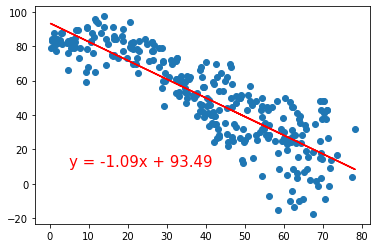

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'].astype(float), northern['Max Temp'].astype(float))
regress_values= northern['Lat'].astype(float) * slope + intercept
line_eq= 'y = ' + str(round(slope, 2)) + 'x + ' +str(round(intercept, 2))
plt.scatter(northern['Lat'], northern['Max Temp'])
plt.plot(northern['Lat'],regress_values,"r-")
print(f"R squared: {rvalue**2}")


# plt.annotate(line_eq, northern['Lat'].astype(float), northern['Max Temp'].astype(float),fontsize=15)
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4168530477101414


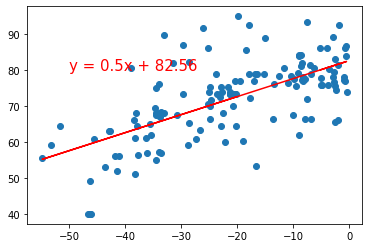

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'].astype(float), southern['Max Temp'].astype(float))
regress_values= southern['Lat'].astype(float) * slope + intercept
line_eq= 'y = ' + str(round(slope, 2)) + 'x + ' +str(round(intercept, 2))
plt.scatter(southern['Lat'], southern['Max Temp']);
plt.plot(southern['Lat'],regress_values,"r-");
print(f"R squared: {rvalue**2}")

# plt.annotate(line_eq, northern['Lat'].astype(float), northern['Max Temp'].astype(float),fontsize=15)
plt.annotate(line_eq,(-50,80),fontsize=15,color="red");

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.1273725628457778


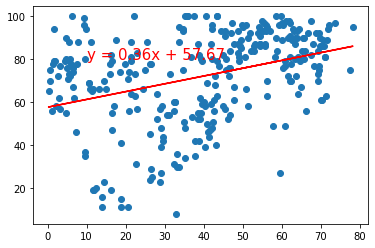

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'].astype(float), northern['Humidity'].astype(float))
regress_values= northern['Lat'].astype(float) * slope + intercept
line_eq= 'y = ' + str(round(slope, 2)) + 'x + ' +str(round(intercept, 2))
plt.scatter(northern['Lat'], northern['Humidity']);
plt.plot(northern['Lat'],regress_values,"r-");
print(f"R squared: {rvalue**2}")

# plt.annotate(line_eq, northern['Lat'].astype(float), northern['Max Temp'].astype(float),fontsize=15)
plt.annotate(line_eq,(10,80),fontsize=15,color="red");

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.011075664341846914


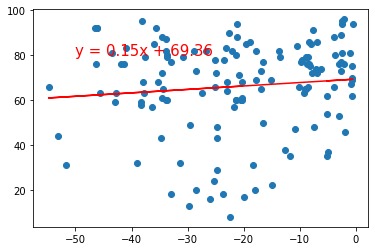

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'].astype(float), southern['Humidity'].astype(float))
regress_values= southern['Lat'].astype(float) * slope + intercept
line_eq= 'y = ' + str(round(slope, 2)) + 'x + ' +str(round(intercept, 2))
plt.scatter(southern['Lat'], southern['Humidity']);
plt.plot(southern['Lat'],regress_values,"r-");
print(f"R squared: {rvalue**2}")

# plt.annotate(line_eq, northern['Lat'].astype(float), northern['Max Temp'].astype(float),fontsize=15)
plt.annotate(line_eq,(-50,80),fontsize=15,color="red");

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03305159327946163


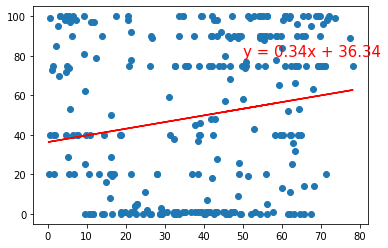

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'].astype(float), northern['Cloudiness'].astype(float))
regress_values= northern['Lat'].astype(float) * slope + intercept
line_eq= 'y = ' + str(round(slope, 2)) + 'x + ' +str(round(intercept, 2))
plt.scatter(northern['Lat'], northern['Cloudiness']);
plt.plot(northern['Lat'],regress_values,"r-");
print(f"R squared: {rvalue**2}")

# plt.annotate(line_eq, northern['Lat'].astype(float), northern['Max Temp'].astype(float),fontsize=15)
plt.annotate(line_eq,(50,80),fontsize=15,color="red");

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.011075664341846914


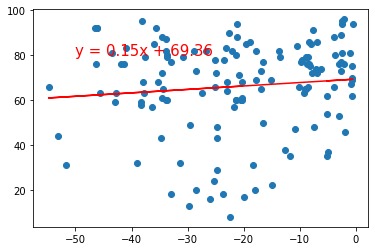

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'].astype(float), southern['Humidity'].astype(float))
regress_values= southern['Lat'].astype(float) * slope + intercept
line_eq= 'y = ' + str(round(slope, 2)) + 'x + ' +str(round(intercept, 2))
plt.scatter(southern['Lat'], southern['Humidity']);
plt.plot(southern['Lat'],regress_values,"r-");
print(f"R squared: {rvalue**2}")

# plt.annotate(line_eq, northern['Lat'].astype(float), northern['Max Temp'].astype(float),fontsize=15)
plt.annotate(line_eq,(-50,80),fontsize=15,color="red");

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.06608377875786163


Text(50, 20, 'y = 0.09x + 5.18')

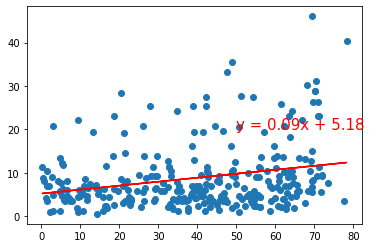

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'].astype(float), northern['Wind Speed'].astype(float))
regress_values= northern['Lat'].astype(float) * slope + intercept
line_eq= 'y = ' + str(round(slope, 2)) + 'x + ' +str(round(intercept, 2))
plt.scatter(northern['Lat'], northern['Wind Speed'])
plt.plot(northern['Lat'],regress_values,"r-")
print(f"R squared: {rvalue**2}")

# plt.annotate(line_eq, northern['Lat'].astype(float), northern['Max Temp'].astype(float),fontsize=15)
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.028914158602662058


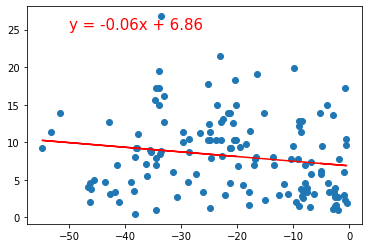

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'].astype(float), southern['Wind Speed'].astype(float))
regress_values= southern['Lat'].astype(float) * slope + intercept
line_eq= 'y = ' + str(round(slope, 2)) + 'x + ' +str(round(intercept, 2))
plt.scatter(southern['Lat'], southern['Wind Speed']);
plt.plot(southern['Lat'],regress_values,"r-");
print(f"R squared: {rvalue**2}")

# plt.annotate(line_eq, northern['Lat'].astype(float), northern['Max Temp'].astype(float),fontsize=15)
plt.annotate(line_eq,(-50,25),fontsize=15,color="red");